In [20]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('Dataset.xlsx')
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
9330,1.5,14,Clay,55
9331,3.0,21,Clay,60
9332,4.5,22,Clay,160
9333,6.0,17,Clay,190


In [21]:
data=data[data['Depth (m)']<=30]
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
9330,1.5,14,Clay,55
9331,3.0,21,Clay,60
9332,4.5,22,Clay,160
9333,6.0,17,Clay,190


In [22]:
data.describe()

,Depth (m),SPT_N,Vs (m/s)
count,7226.000000,7226.000000,7226.000000
mean,15.763078,24.268613,240.411431
std,8.639852,19.550561,94.720906
min,1.500000,1.000000,15.000000
25%,9.000000,11.000000,175.000000
50%,16.500000,19.000000,235.000000
75%,23.625000,31.000000,300.000000
max,30.000000,250.000000,850.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7226 entries, 0 to 9334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth (m)  7226 non-null   float64
 1   SPT_N      7226 non-null   int64  
 2   Soil Type  7226 non-null   object 
 3   Vs (m/s)   7226 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 282.3+ KB


# Depth

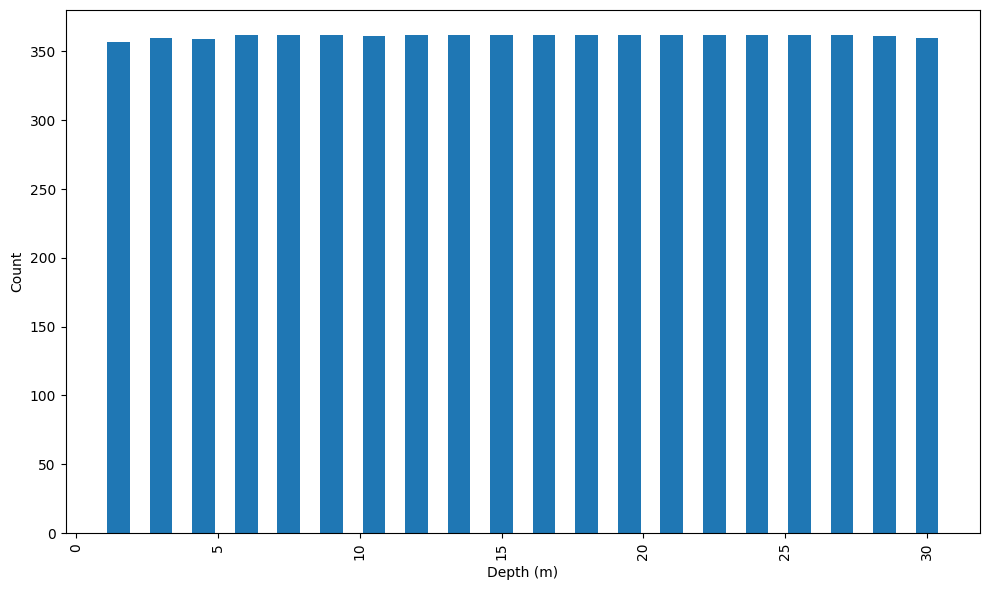

In [24]:
col='Depth (m)'
depth_counts = data[col].value_counts().sort_index()
plt.figure(figsize=(10, 6))  
plt.bar(depth_counts.index, depth_counts.values)
plt.xlabel('Depth (m)')
plt.ylabel('Count')
plt.ylabdepth_counts = data[col].value_counts().sort_index()
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

# SPT_N

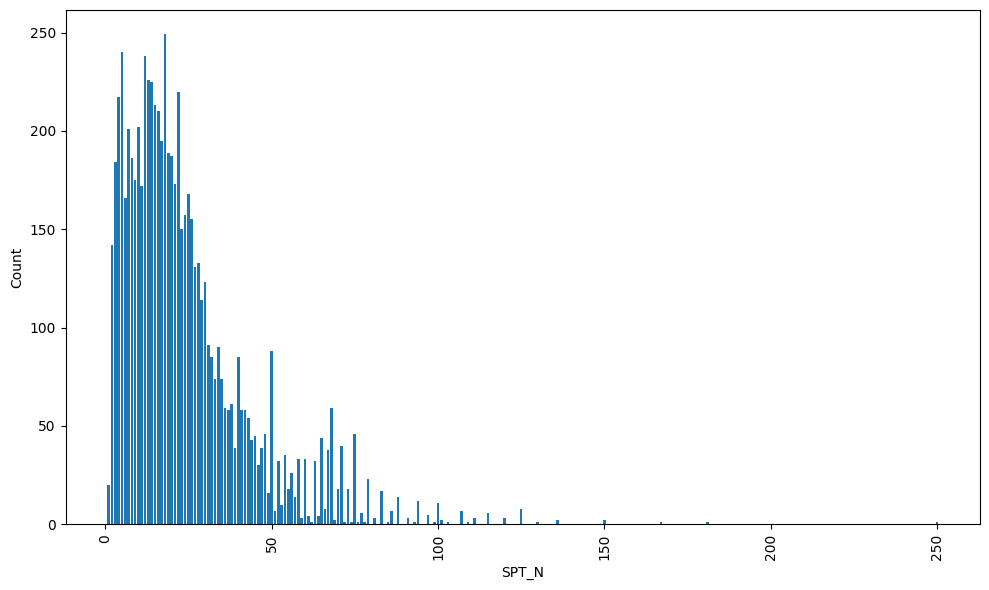

In [25]:
col='SPT_N'
depth_counts = data[col].value_counts().sort_index()
plt.figure(figsize=(10, 6))  
plt.bar(depth_counts.index, depth_counts.values)
plt.xlabel(col)
plt.ylabel('Count')
plt.ylabdepth_counts = data[col].value_counts().sort_index()
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [26]:
data[data['SPT_N']>200]


,Depth (m),SPT_N,Soil Type,Vs (m/s)
3859,28.5,250,Sand,300


In [27]:
data=data[data['SPT_N']<=200]
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
9330,1.5,14,Clay,55
9331,3.0,21,Clay,60
9332,4.5,22,Clay,160
9333,6.0,17,Clay,190


# Vs(m/s)

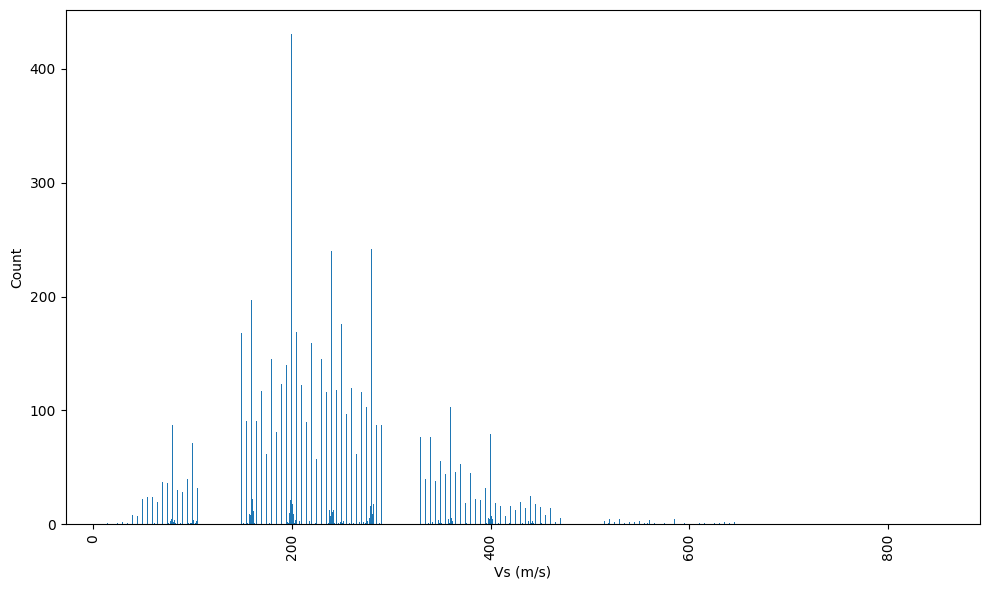

In [28]:
col = 'Vs (m/s)'

depth_counts = data[col].value_counts().sort_index()
plt.figure(figsize=(10, 6))  
plt.bar(depth_counts.index, depth_counts.values)
plt.xlabel(col)
plt.ylabel('Count')
plt.ylabdepth_counts = data[col].value_counts().sort_index()
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

# Soil Type

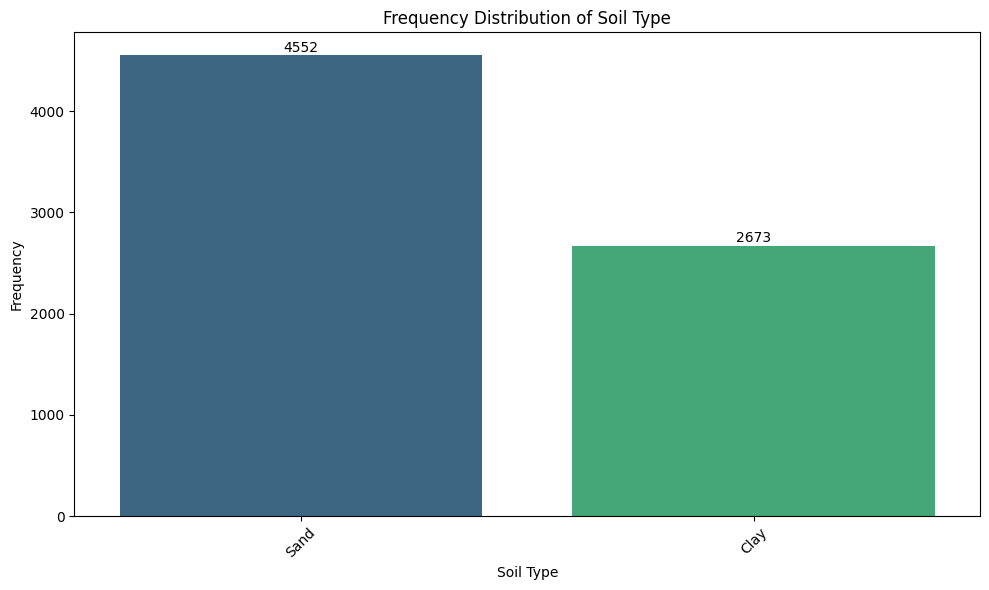

In [29]:
column_name = 'Soil Type'

value_counts = data[column_name].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title(f'Frequency Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)  


for i, count in enumerate(value_counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3D corrrelation

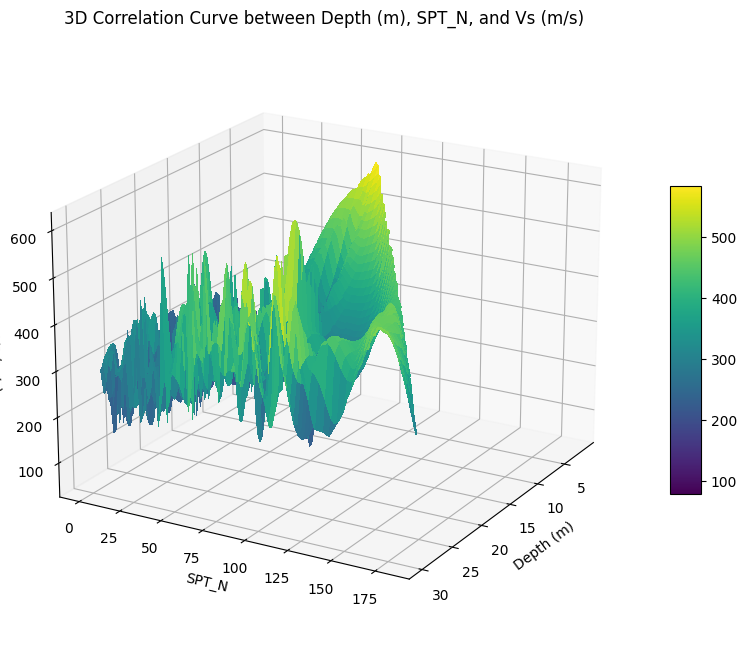

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata


columns_to_plot = ["Depth (m)", "SPT_N", "Vs (m/s)"]


x = data[columns_to_plot[0]]
y = data[columns_to_plot[1]]
z = data[columns_to_plot[2]]


xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


zi = griddata((x, y), z, (xi, yi), method='cubic')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0, antialiased=False)


ax.set_xlabel(columns_to_plot[0])
ax.set_ylabel(columns_to_plot[1])


ax.set_zlabel(columns_to_plot[2], rotation=90)


ax.set_title(f'3D Correlation Curve between {columns_to_plot[0]}, {columns_to_plot[1]}, and {columns_to_plot[2]}')


ax.view_init(elev=20, azim=30)


fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

# Dependent variable correlation

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


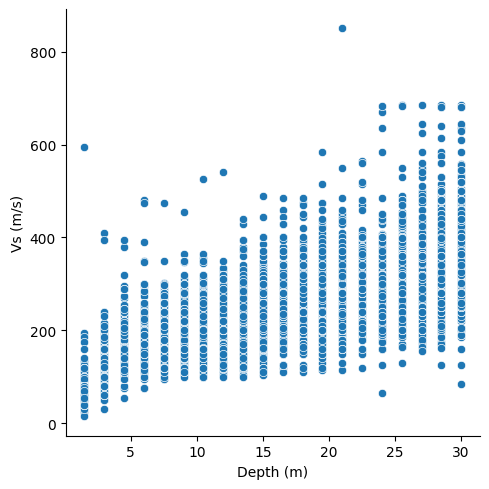

In [31]:
sns.relplot(data=data, x="Depth (m)", y="Vs (m/s)")

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


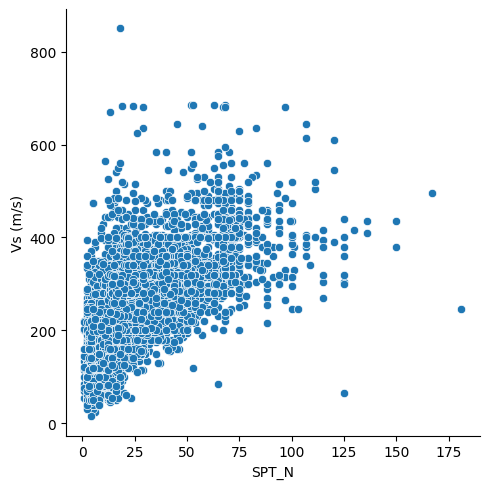

In [32]:
sns.relplot(data=data, x="SPT_N", y="Vs (m/s)")

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


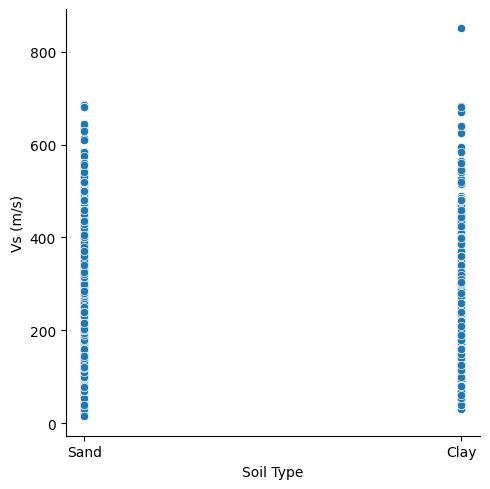

In [33]:
sns.relplot(data=data, x="Soil Type", y="Vs (m/s)")

In [38]:
data2 = data.copy(deep=True)
data2 = pd.get_dummies(data2, columns=["Soil Type"], prefix=["Soil_Type"], drop_first=True, dtype=int)
data2

,Depth (m),SPT_N,Vs (m/s),Soil_Type_Sand
0,1.5,4,70,1
1,3.0,5,135,1
2,4.5,3,175,1
3,6.0,2,200,1
4,7.5,10,290,1
...,...,...,...,...
9330,1.5,14,55,0
9331,3.0,21,60,0
9332,4.5,22,160,0
9333,6.0,17,190,0


In [39]:
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
9330,1.5,14,Clay,55
9331,3.0,21,Clay,60
9332,4.5,22,Clay,160
9333,6.0,17,Clay,190


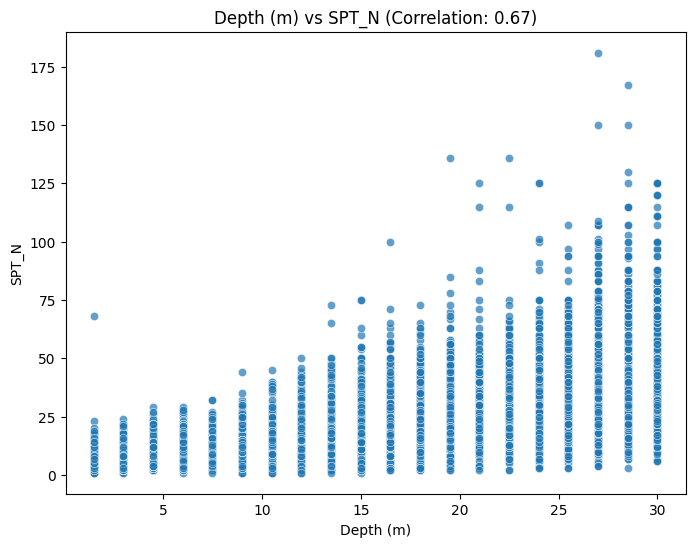

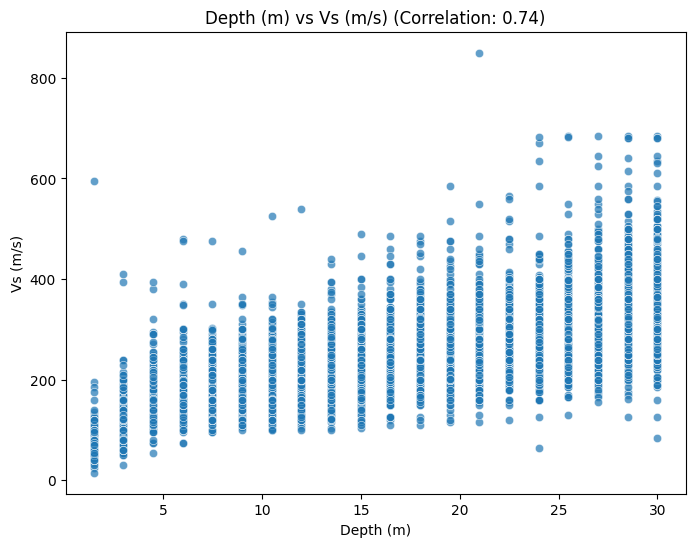

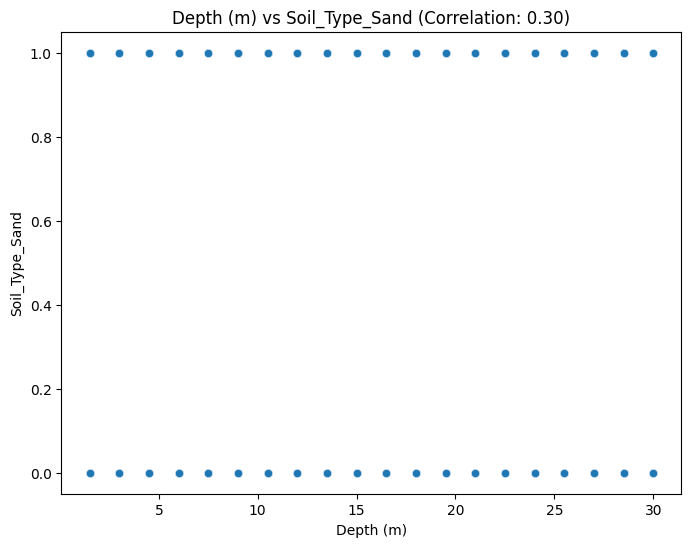

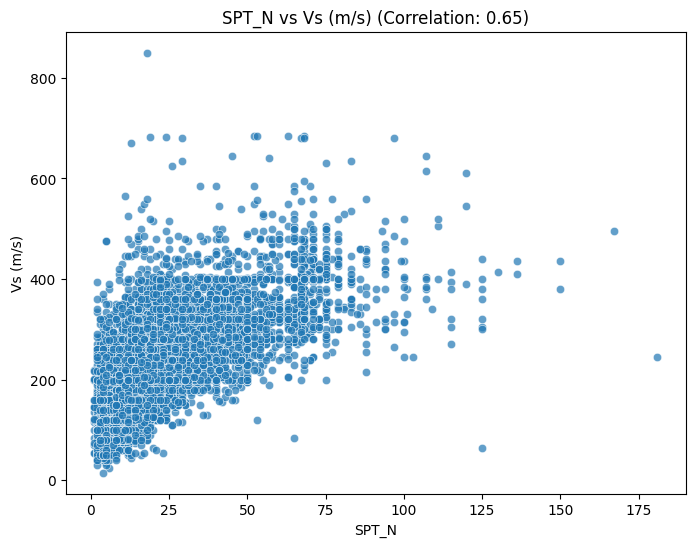

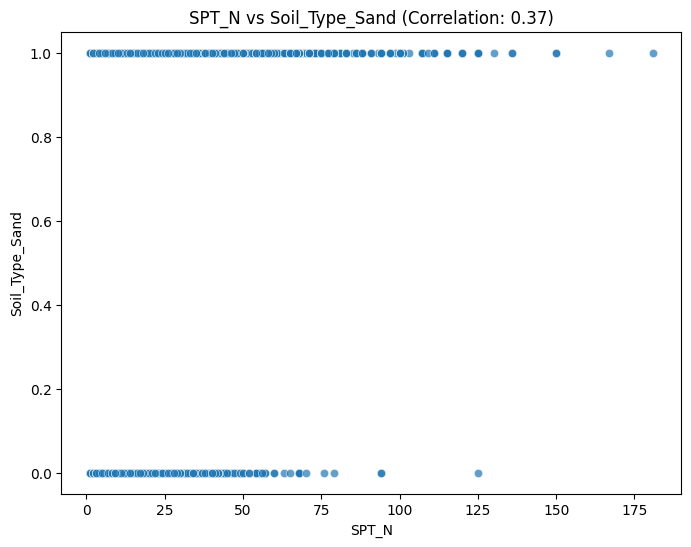

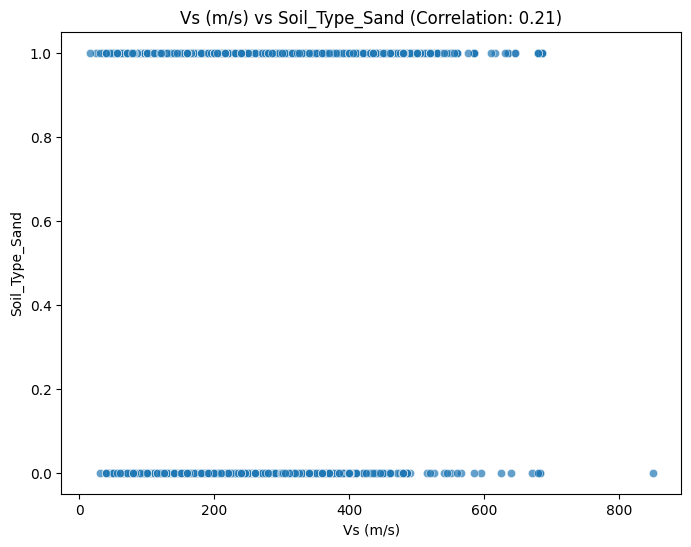

In [41]:
correlation_matrix = data2.corr()

columns = data2.columns


for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(8, 6))
        
        
        sns.scatterplot(data=data2, x=columns[i], y=columns[j], alpha=0.7)
        
        
        correlation_coeff = correlation_matrix.iloc[i, j]
        plt.title(f'{columns[i]} vs {columns[j]} (Correlation: {correlation_coeff:.2f})')
        
        plt.show()

# Heatmap

<Axes: >

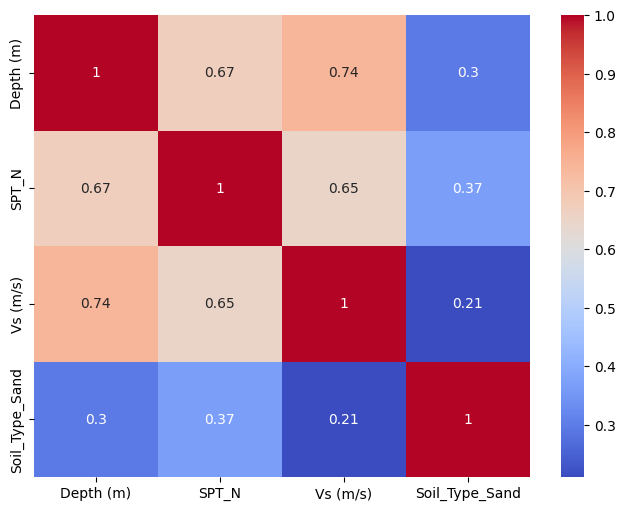

In [43]:
corr=data2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)


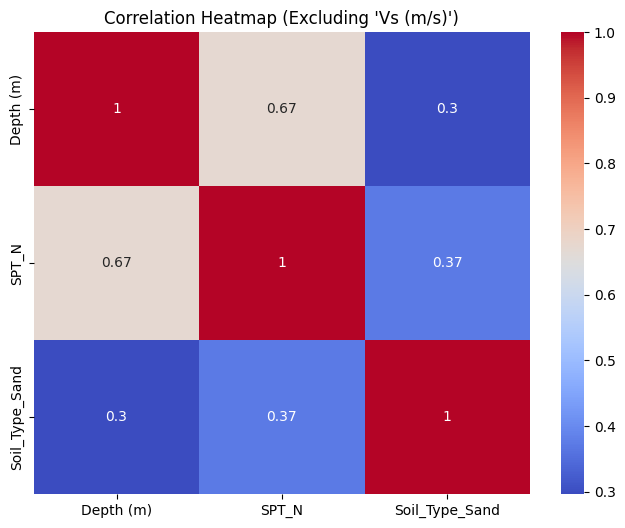

In [44]:
corr = data2.drop(columns=['Vs (m/s)']).corr() 

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap (Excluding 'Vs (m/s)')")
plt.show()

# Box plot

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<Figure size 800x1200 with 0 Axes>

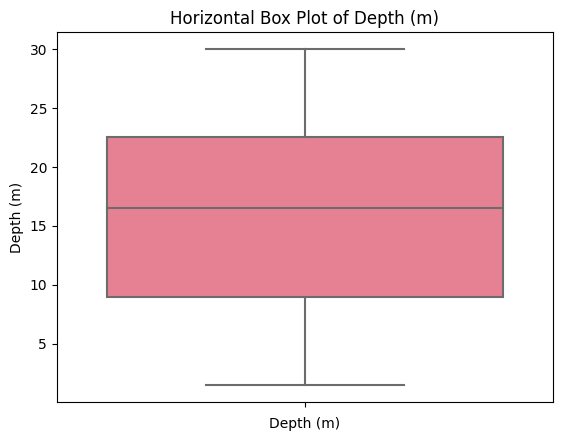

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


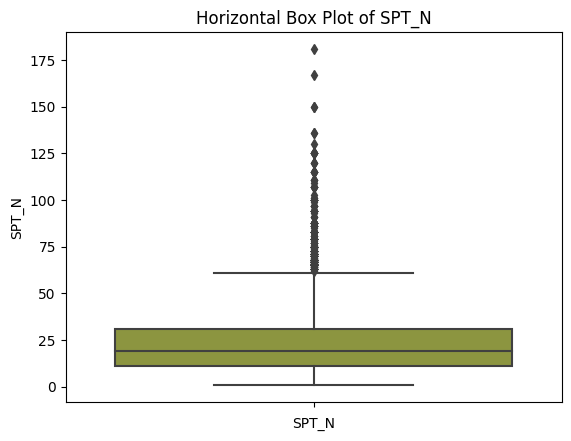

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


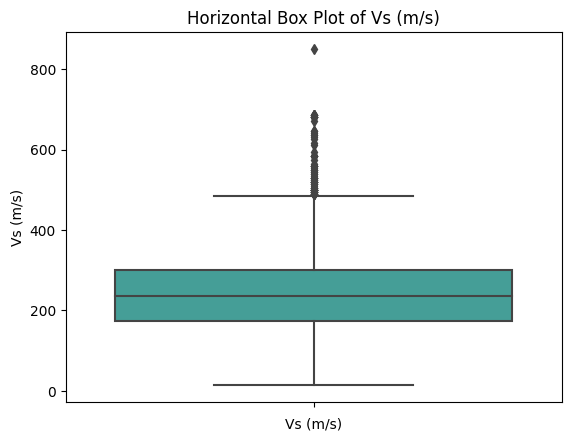

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


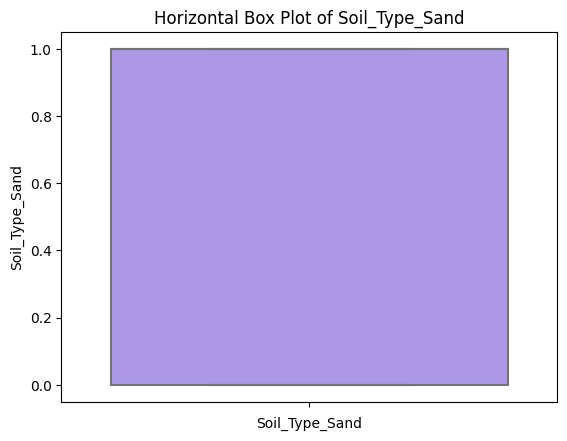

In [47]:
plt.figure(figsize=(8, 12))  


palette = sns.color_palette("husl", len(data2.columns))

for i, column in enumerate(data2.columns):
    plt.figure()
    sns.boxplot(y=column, data=data2, color=palette[i % len(palette)], orient='h')
    plt.title(f'Horizontal Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [49]:
data.to_csv('processed_data.csv',index=False)